## list

* 1. find 2D rigid body transform
* 2. visualize coordinate
* 3. Transform y (height) coordinate
* 4. point cloud test

### 1. find 2D rigid body transform

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import csv
import matplotlib.cm as cm
import utm
from pyproj import Proj

In [3]:
lat = 25.017217
lng = 121.5418275
_, _, zone, R = utm.from_latlon(lat, lng)
proj = Proj(proj='utm', zone=zone, ellps='WGS84', preserve_units=False)
ux1, uy1 = proj(lng, lat)

lat = 25.017225833333335
lng = 121.54183416666666
_, _, zone, R = utm.from_latlon(lat, lng)
proj = Proj(proj='utm', zone=zone, ellps='WGS84', preserve_units=False)
ux2, uy2 = proj(lng, lat)

Text(0.5, 1.0, 'utm comparison original')

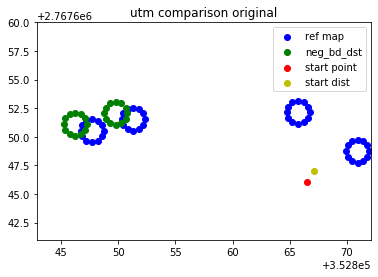

In [5]:
neg_bd_dst_1 = np.load('/home/ncslaber/109-2/210725_NTU_leftAreaLibrary/ntu_test2_cut2_204-241/shapefiles/'+'neg_'+str(1)+'_bd_utm.npy')
neg_bd_dst_2 = np.load('/home/ncslaber/109-2/210725_NTU_leftAreaLibrary/ntu_test2_cut2_204-241/shapefiles/'+'neg_'+str(2)+'_bd_utm.npy')

neg_bd_source_1 = np.load('/home/ncslaber/109-2/210725_NTU_leftAreaLibrary/ntu_test3_2021-07-25-18-23-39/shapefiles/'+'neg_'+str(1)+'_bd_utm.npy')
neg_bd_source_2 = np.load('/home/ncslaber/109-2/210725_NTU_leftAreaLibrary/ntu_test3_2021-07-25-18-23-39/shapefiles/'+'neg_'+str(2)+'_bd_utm.npy')

plt.axis('equal')
for i in range(4):
    neg_bd = np.load('/home/ncslaber/109-2/210725_NTU_leftAreaLibrary/ntu_test3_2021-07-25-18-23-39/shapefiles/'+'neg_'+str(i+1)+'_bd_utm.npy')
    if i == 3:
        plt.scatter(neg_bd[:,0], neg_bd[:,1], c='b', label='ref map')
    else:
        plt.scatter(neg_bd[:,0], neg_bd[:,1], c='b')
    
plt.scatter(neg_bd_dst_1[:,0], neg_bd_dst_1[:,1], c='g', label='neg_bd_dst')
plt.scatter(neg_bd_dst_2[:,0], neg_bd_dst_2[:,1], c='g')
plt.scatter(ux1, uy1,c='r', label='start point')
plt.scatter(ux2, uy2,c='y', label='start dist')
plt.ylim((2767641,2767660))
plt.xlim((352830, 352885))
plt.legend()
plt.title("utm comparison original")

In [42]:
transform,_ = cv2.estimateAffine2D(neg_bd_source_1,neg_bd_dst_1)
print(neg_bd_source_1.shape)
transform

(12, 2)


array([[ 1.     ,  0.     , -1.46875],
       [ 0.     ,  1.     ,  0.5    ]])

In [7]:
transform,_ = cv2.estimateAffine2D(neg_bd_source_2,neg_bd_dst_2)
transform

array([[ 1.     ,  0.     , -1.53125],
       [ 0.     ,  1.     ,  0.5    ]])

In [106]:
neg_bd_dst = np.vstack((neg_bd_dst_1,neg_bd_dst_2))
neg_bd_source = np.vstack((neg_bd_source_1,neg_bd_source_2))
transform,_ = cv2.estimateAffine2D(neg_bd_source,neg_bd_dst)
transform

array([[ 9.99076832e-01, -6.33894845e-02,  1.75764212e+05],
       [-0.00000000e+00,  1.00000000e+00,  5.00000000e-01]])

In [8]:
neg_bd_dst_new_1 = neg_bd_dst_1-transform[:,2]
neg_bd_dst_new_2 = neg_bd_dst_2-transform[:,2]

Text(0.5, 1.0, 'after rigidBody transform')

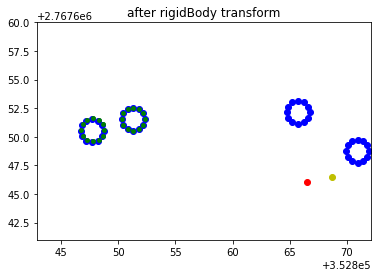

In [11]:
plt.axis('equal')
for i in range(4):
    neg_bd = np.load('/home/ncslaber/109-2/210725_NTU_leftAreaLibrary/ntu_test3_2021-07-25-18-23-39/shapefiles/'+'neg_'+str(i+1)+'_bd_utm.npy')
    plt.scatter(neg_bd[:,0], neg_bd[:,1], c='b')
plt.scatter(neg_bd_dst_new_1[:,0], neg_bd_dst_new_1[:,1], c='g',s=15)
plt.scatter(neg_bd_dst_new_2[:,0], neg_bd_dst_new_2[:,1], c='g',s=15)
plt.scatter(ux1, uy1,c='r', label='start point')
plt.scatter(ux2-transform[0,2], uy2-transform[1,2],c='y', label='start dist')
plt.ylim((2767641,2767660))
plt.xlim((352830, 352885))
plt.title('after rigidBody transform')

#### Another case

(2767641, 2767660)

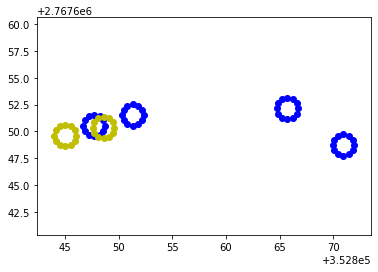

In [103]:
neg_bd_0818_x = []
neg_bd_0818_y = []
neg_bd_0725_x = []
neg_bd_0725_y = []
neg_bd_0725 = []
neg_bd_0818 = []
plt.axis('equal')

shp_path = '/home/ncslaber/109-2/210725_NTU_leftAreaLibrary/ntu_test3_2021-07-25-18-23-39/shapefiles/'
for i in range(4):
    neg_bd = np.load(shp_path+'neg_'+str(i+1)+'_bd_utm.npy')
    plt.scatter(neg_bd[:,0], neg_bd[:,1], c='b')
    neg_bd_0725_x.append(neg_bd[:,0])
    neg_bd_0725_y.append(neg_bd[:,1])

shp_path = '/home/ncslaber/109-2/210818_NTU_libraryAll/ChiaY_outerHalf_2021-08-17-17-17-10/shapefiles/'
# fig, ax = plt.subplots(figsize=(8, 8))
for i in range(2):
    neg_bd = np.load(shp_path+'neg_'+str(i+1)+'_bd_utm.npy')
    plt.scatter(neg_bd[:,0], neg_bd[:,1], c='y')
    neg_bd_0818_x.append(neg_bd[:,0])
    neg_bd_0818_y.append(neg_bd[:,1])

plt.ylim((2767641,2767660))
# plt.xlim((352830, 352885))

In [96]:
neg_bd_0818_x = np.asarray(neg_bd_0818_x)
neg_bd_0725_x = np.asarray(neg_bd_0725_x)
neg_bd_0818_y = np.asarray(neg_bd_0818_y)
neg_bd_0725_y = np.asarray(neg_bd_0725_y)
neg_bd_0818_x = neg_bd_0818_x.reshape((-1,1))
neg_bd_0818_y = neg_bd_0818_y.reshape((-1,1))
neg_bd_0725_x = neg_bd_0725_x.reshape((-1,1))
neg_bd_0725_y = neg_bd_0725_y.reshape((-1,1))

neg_bd_0818 = np.hstack((neg_bd_0818_x,neg_bd_0818_y))
neg_bd_0725 = np.hstack((neg_bd_0725_x,neg_bd_0725_y))
print(neg_bd_0725.shape)
print(neg_bd_0818.shape)

(12, 2)
(12, 2)


In [97]:
transform,_ = cv2.estimateAffine2D(neg_bd_0725,neg_bd_0818) # from / to
transform

array([[ 1.    ,  0.    , -2.6875],
       [ 0.    ,  1.    , -1.    ]])

In [87]:
transform[:,:2]

array([[ 0.98415156, -0.35613448],
       [ 0.10063422,  0.72900447]])

In [86]:
neg_bd_0725

array([[ 352848.72283672, 2767650.54223444],
       [ 352848.58886213, 2767651.04223444],
       [ 352848.22283672, 2767651.40825984],
       [ 352847.72283672, 2767651.54223444],
       [ 352847.22283672, 2767651.40825984],
       [ 352846.85681132, 2767651.04223444],
       [ 352846.72283672, 2767650.54223444],
       [ 352846.85681132, 2767650.04223444],
       [ 352847.22283672, 2767649.67620903],
       [ 352847.72283672, 2767649.54223444],
       [ 352848.22283672, 2767649.67620903],
       [ 352848.58886213, 2767650.04223444],
       [ 352852.32283672, 2767651.54223444],
       [ 352852.18886213, 2767652.04223444],
       [ 352851.82283672, 2767652.40825984],
       [ 352851.32283672, 2767652.54223444],
       [ 352850.82283672, 2767652.40825984],
       [ 352850.45681132, 2767652.04223444],
       [ 352850.32283672, 2767651.54223444],
       [ 352850.45681132, 2767651.04223444],
       [ 352850.82283672, 2767650.67620903],
       [ 352851.32283672, 2767650.54223444],
       [ 3

In [90]:
neg_bd_0818_new = neg_bd_0725.dot(transform[:,:2])

In [91]:
neg_bd_0818_new

array([[ 625776.97961429, 1891968.01936458],
       [ 625776.8980801 , 1891968.43157979],
       [ 625776.57469031, 1891968.82876821],
       [ 625776.09609696, 1891969.10450353],
       [ 625775.59053875, 1891969.18490268],
       [ 625775.1934796 , 1891969.04842279],
       [ 625775.01131118, 1891968.73163353],
       [ 625775.09284538, 1891968.31941832],
       [ 625775.41623517, 1891967.9222299 ],
       [ 625775.89482852, 1891967.64649459],
       [ 625776.40038672, 1891967.56609543],
       [ 625776.79744588, 1891967.70257532],
       [ 625780.62319412, 1891967.46628494],
       [ 625780.54165992, 1891967.87850015],
       [ 625780.21827013, 1891968.27568857],
       [ 625779.73967679, 1891968.55142388],
       [ 625779.23411858, 1891968.63182304],
       [ 625778.83705943, 1891968.49534315],
       [ 625778.65489101, 1891968.17855389],
       [ 625778.7364252 , 1891967.76633868],
       [ 625779.05981499, 1891967.36915026],
       [ 625779.53840834, 1891967.09341495],
       [ 6

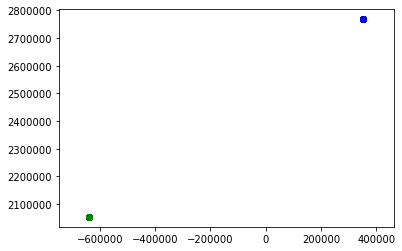

In [81]:
plt.axis('equal')
plt.scatter(neg_bd_0818_new[:,0]-transform[0,2], neg_bd_0818_new[:,1]-transform[1,2], c='g')
plt.scatter(neg_bd_0725[:,0], neg_bd_0725[:,1], c='b')

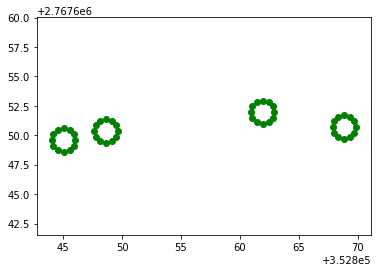

In [61]:
plt.axis('equal')
plt.scatter(neg_bd_0818[:,0], neg_bd_0818[:,1], c='g')
# plt.scatter(neg_bd_0725_new[:,0], neg_bd_0725_new[:,1], c='b')

### 2. visualize coordinate

Text(0.5, 1.0, 'reference map (in pixel)')

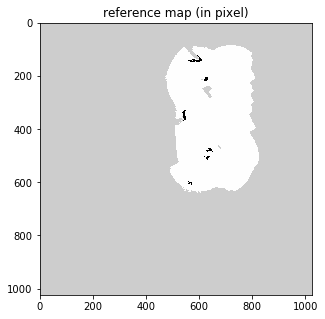

In [13]:
directory = '/home/ncslaber/109-2/210725_NTU_leftAreaLibrary/'
bag_name = 'ntu_test3_2021-07-25-18-23-39/'
file_path = directory+bag_name
shp_path = file_path + 'shapefiles/'

centroid_filteredNP_ref = np.load(file_path+'centroid_filteredList.npy')

fig, ax = plt.subplots(figsize=(5,5))
raw_pgm = cv2.imread(file_path+"hector_48_99.pgm")
plt.imshow(cv2.cvtColor(raw_pgm, cv2.COLOR_BGR2RGB))
plt.title('reference map (in pixel)')

Text(0.5, 1.0, 'map at k=41-50 (in pixel)')

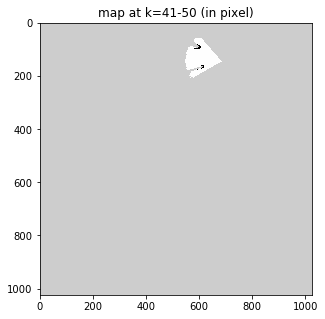

In [14]:
directory = '/home/ncslaber/109-2/210725_NTU_leftAreaLibrary/'
bag_name = 'ntu_test2_cut2_204-241/'
file_path = directory+bag_name
shp_path = file_path + 'shapefiles/'

centroid_filteredNP_k = np.load(file_path+'centroid_filteredList.npy')

fig, ax = plt.subplots(figsize=(5,5))
raw_pgm = cv2.imread(file_path+"frame02.pgm")
plt.imshow(cv2.cvtColor(raw_pgm, cv2.COLOR_BGR2RGB))
plt.title('map at k=41-50 (in pixel)')

### 3. Transform y (height) coordinate

In [15]:
npDepth = np.load('/home/ncslaber/109-2/210420_acrossTree/npy_depth/npy/26_0.npy')
def depth(x,y):
    return npDepth[x][y]

cx_d = 328 #424
cy_d = 241 #241
fx_d = 617 #424
fy_d = 617 #424

npPointX = np.asarray(range(640))-cx_d
npPointX = np.diag(npPointX)
npPointX = npDepth.dot(npPointX)/ fx_d * (-1)

npPointY = np.asarray(range(480))-cy_d
npPointY = np.diag(npPointY)
theta = 2/180*np.pi
npPointY = npPointY.dot(npDepth)/ fy_d * (-1) 
npPointY = npPointY*np.cos(theta) + npDepth * np.sin(theta) + 360

npPointY = npPointY.astype('float16')

float16


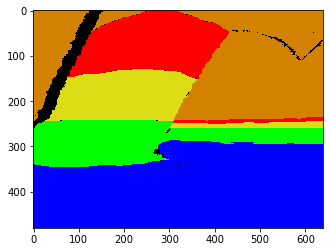

In [16]:
'''depth segmentation'''
npHeight = np.copy(npPointY)
color_seq = {'brown': (0,130,210), 'red':(0,0,255),'yellow':(22,220,220),
                'green':(0,255,0),'blue':(255,0,0),'black':(0,0,0)}
npHeight_seg = np.zeros((npDepth.shape[0],npDepth.shape[1],3))

npHeight_seg[npHeight<200]=color_seq['blue']
npHeight_seg[np.logical_and(npHeight<400,npHeight>200)]=color_seq['green']
npHeight_seg[np.logical_and(npHeight<600,npHeight>400)]=color_seq['yellow']
npHeight_seg[np.logical_and(npHeight<800,npHeight>600)]=color_seq['red']
npHeight_seg[npHeight>800]=color_seq['brown']
npHeight_seg[npHeight==360]=color_seq['black']
# npHeight_seg[np.logical_and(npHeight<0.9,npHeight>-0.9)]=(255,255,255)
# print(*(npDepth[np.logical_and(npHeight<0.9,npHeight>-0.9)]))
print(npHeight.dtype)
npHeight_seg = npHeight_seg.astype('uint8')
%matplotlib inline
plt.imshow(cv2.cvtColor(npHeight_seg, cv2.COLOR_BGR2RGB))

### 4. point cloud test

In [17]:
pcl_path = '/home/ncslaber/109-2/210824_calibration/pointCloud_distance/test1/'
pointCloud6 = np.load(pcl_path+"pointCloud_6m.npy")
pointCloud5 = np.load(pcl_path+"pointCloud_5m.npy")
pointCloud4 = np.load(pcl_path+"pointCloud_4m.npy")
pointCloud3 = np.load(pcl_path+"pointCloud_3m.npy")
pointCloud2 = np.load(pcl_path+"pointCloud_2m.npy")
pointCloud1 = np.load(pcl_path+"pointCloud_1m.npy")

In [18]:
colors = cm.rainbow(np.linspace(1, 0, 6))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

(0, 7)

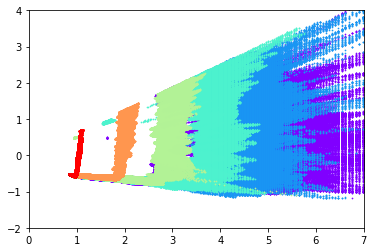

In [19]:
# side view
pointCloud = pointCloud6
x_pcl = pointCloud[:,:,0]
y_pcl = pointCloud[:,:,1]
z_pcl = pointCloud[:,:,2]
x_pcl = np.reshape(x_pcl, (-1,1))
y_pcl = np.reshape(y_pcl, (-1,1))
z_pcl = np.reshape(z_pcl, (-1,1))
plt.scatter(z_pcl, -y_pcl, s=0.5, c=colors[5])

pointCloud = pointCloud5
x_pcl = pointCloud[:,:,0]
y_pcl = pointCloud[:,:,1]
z_pcl = pointCloud[:,:,2]
x_pcl = np.reshape(x_pcl, (-1,1))
y_pcl = np.reshape(y_pcl, (-1,1))
z_pcl = np.reshape(z_pcl, (-1,1))
plt.scatter(z_pcl, -y_pcl, s=0.5, c=colors[4])

pointCloud = pointCloud4
x_pcl = pointCloud[:,:,0]
y_pcl = pointCloud[:,:,1]
z_pcl = pointCloud[:,:,2]
x_pcl = np.reshape(x_pcl, (-1,1))
y_pcl = np.reshape(y_pcl, (-1,1))
z_pcl = np.reshape(z_pcl, (-1,1))
plt.scatter(z_pcl, -y_pcl, s=0.5, c=colors[3])

pointCloud = pointCloud3
x_pcl = pointCloud[:,:,0]
y_pcl = pointCloud[:,:,1]
z_pcl = pointCloud[:,:,2]
x_pcl = np.reshape(x_pcl, (-1,1))
y_pcl = np.reshape(y_pcl, (-1,1))
z_pcl = np.reshape(z_pcl, (-1,1))
plt.scatter(z_pcl, -y_pcl, s=0.5, c=colors[2])

pointCloud = pointCloud2
x_pcl = pointCloud[:,:,0]
y_pcl = pointCloud[:,:,1]
z_pcl = pointCloud[:,:,2]
x_pcl = np.reshape(x_pcl, (-1,1))
y_pcl = np.reshape(y_pcl, (-1,1))
z_pcl = np.reshape(z_pcl, (-1,1))
plt.scatter(z_pcl, -y_pcl, s=0.5, c=colors[1])

pointCloud = pointCloud1
x_pcl = pointCloud[:,:,0]
y_pcl = pointCloud[:,:,1]
z_pcl = pointCloud[:,:,2]
x_pcl = np.reshape(x_pcl, (-1,1))
y_pcl = np.reshape(y_pcl, (-1,1))
z_pcl = np.reshape(z_pcl, (-1,1))
plt.scatter(z_pcl, -y_pcl, s=0.5, c=colors[0])

plt.ylim((-2,4))
plt.xlim((0,7))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

(-7.5, 7.5)

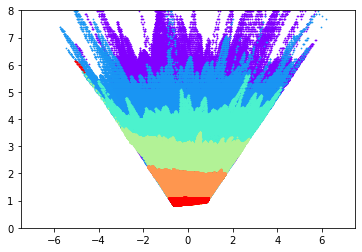

In [20]:
# top-down view
pointCloud = pointCloud6
x_pcl = pointCloud[:,:,0]
y_pcl = pointCloud[:,:,1]
z_pcl = pointCloud[:,:,2]
x_pcl = np.reshape(x_pcl, (-1,1))
y_pcl = np.reshape(y_pcl, (-1,1))
z_pcl = np.reshape(z_pcl, (-1,1))
plt.scatter(x_pcl, z_pcl, s=0.5, c=colors[5])

pointCloud = pointCloud5
x_pcl = pointCloud[:,:,0]
y_pcl = pointCloud[:,:,1]
z_pcl = pointCloud[:,:,2]
x_pcl = np.reshape(x_pcl, (-1,1))
y_pcl = np.reshape(y_pcl, (-1,1))
z_pcl = np.reshape(z_pcl, (-1,1))
plt.scatter(x_pcl, z_pcl, s=0.5, c=colors[4])

pointCloud = pointCloud4
x_pcl = pointCloud[:,:,0]
y_pcl = pointCloud[:,:,1]
z_pcl = pointCloud[:,:,2]
x_pcl = np.reshape(x_pcl, (-1,1))
y_pcl = np.reshape(y_pcl, (-1,1))
z_pcl = np.reshape(z_pcl, (-1,1))
plt.scatter(x_pcl, z_pcl, s=0.5, c=colors[3])

pointCloud = pointCloud3
x_pcl = pointCloud[:,:,0]
y_pcl = pointCloud[:,:,1]
z_pcl = pointCloud[:,:,2]
x_pcl = np.reshape(x_pcl, (-1,1))
y_pcl = np.reshape(y_pcl, (-1,1))
z_pcl = np.reshape(z_pcl, (-1,1))
plt.scatter(x_pcl, z_pcl, s=0.5, c=colors[2])

pointCloud = pointCloud2
x_pcl = pointCloud[:,:,0]
y_pcl = pointCloud[:,:,1]
z_pcl = pointCloud[:,:,2]
x_pcl = np.reshape(x_pcl, (-1,1))
y_pcl = np.reshape(y_pcl, (-1,1))
z_pcl = np.reshape(z_pcl, (-1,1))
plt.scatter(x_pcl, z_pcl, s=0.5, c=colors[1])

pointCloud = pointCloud1
x_pcl = pointCloud[:,:,0]
y_pcl = pointCloud[:,:,1]
z_pcl = pointCloud[:,:,2]
x_pcl = np.reshape(x_pcl, (-1,1))
y_pcl = np.reshape(y_pcl, (-1,1))
z_pcl = np.reshape(z_pcl, (-1,1))
plt.scatter(x_pcl, z_pcl, s=0.5, c=colors[0])

plt.ylim((0,8))
plt.xlim((-7.5,7.5))

(0, 7)

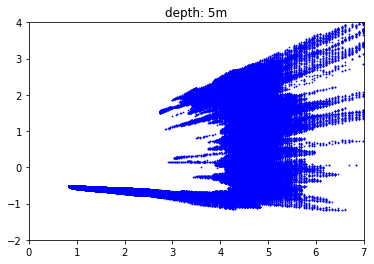

In [25]:
pointCloud = pointCloud5
x_pcl = pointCloud[:,:,0]
y_pcl = pointCloud[:,:,1]
z_pcl = pointCloud[:,:,2]

x_pcl = np.reshape(x_pcl, (-1,1))
y_pcl = np.reshape(y_pcl, (-1,1))
z_pcl = np.reshape(z_pcl, (-1,1))

plt.scatter(z_pcl, -y_pcl, s=0.5, c='b')
plt.title('depth: 5m')
plt.ylim((-2,4))
plt.xlim((0,7))

(0, 7)

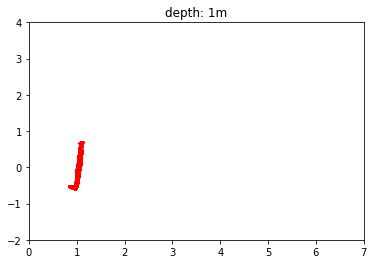

In [27]:
pointCloud = pointCloud1
x_pcl = pointCloud[:,:,0]
y_pcl = pointCloud[:,:,1]
z_pcl = pointCloud[:,:,2]

x_pcl = np.reshape(x_pcl, (-1,1))
y_pcl = np.reshape(y_pcl, (-1,1))
z_pcl = np.reshape(z_pcl, (-1,1))

plt.scatter(z_pcl, -y_pcl, s=0.5, c='r')
plt.title('depth: 1m')
plt.ylim((-2,4))
plt.xlim((0,7))